# 6 Undergraduate
This section explores the degree to which undergraduate median sat, tuition, or institution were associated decision

## 6.1 Key Findings
Data does not support relationships between university, tuition, or sat score and decision.

In [ ]:
# libraries
%matplotlib inline

import os
import sys
import inspect

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
projdir = os.path.dirname(currentdir)
srcdir = os.path.join(projdir,"src")
datasrc = os.path.join(srcdir, "data")

sys.path.insert(0,currentdir)
sys.path.insert(0,projdir)
sys.path.insert(0,srcdir)
sys.path.insert(0,datasrc)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', 5000)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

import read
from shared import directories
sys.path.append(directories.ANALYSIS_DIR)
sys.path.append(directories.UTILITIES_DIR)
from analysis import trivariate

import univariate, bivariate, independence, visual, description
import warnings
warnings.filterwarnings('ignore')

## 6.2 Data

In [ ]:
# Get Data
sd = read.read()
df = sd['all']
df_male = sd['male']
df_female = sd['female']
univ = ['mn_sat', 'tuition', 'uni_rank']
df_univ = df[univ]
df_male_univ = df_male[univ]
df_female_univ = df_female[univ]
#Drop NA
df_univ = df_univ.dropna()
df_male_univ = df_male_univ.dropna()
df_female_univ = df_female_univ.dropna()

## 6.3 Univariate Analysis

### 6.3.1 Univariate Analysis Key Questions
- What was the distribution of median sat scores
- What was distribution of tuition scores

### 6.3.2 Univariate Analysis Key Findings
- added university rank by median sat percent ranking 


In [ ]:
result = univariate.analysis(df_univ)
for r in result:
    r['desc']
    r['plot']


## 6.4 Bivariate Analysis

### 6.4.1 Subject Decision by Sat Score

In [ ]:
i, d, p = bivariate.analysis(x='mn_sat', y='dec', df=df)
p
d
i

### 6.4.2 Subject Decision by Tuition

In [ ]:
i, d, p = bivariate.analysis(x='tuition', y='dec', df=df)
p
d
i

### 6.4.3 Subject Decision by University Rank

In [ ]:
i, d, p = bivariate.analysis(x='uni_rank', y='dec', df=df)
p
d
i

### 6.4.4 Partner Decision by Sat Score

In [ ]:
i, d, p = bivariate.analysis(x='mn_sat', y='dec_o', df=df)
p
d
i

### 6.4.5 Partner Decision by Tuition

In [ ]:
i, d, p = bivariate.analysis(x='tuition', y='dec_o', df=df)
p
d
i

### 6.4.6 Partner Decision by University Rank

In [ ]:
i, d, p = bivariate.analysis(x='uni_rank', y='dec_o', df=df)
p
d
i

## 6.5 Multivariate Analysis

### 6.5.1 Subject Decision by Sat Score and Gender

In [ ]:
i, d, p = trivariate.analysis(x='mn_sat', y='dec', z='gender', df=df)
p
d
i

### 6.5.2 Subject Decision by Tuition and Gender

In [ ]:
i, d, p = trivariate.analysis(x='tuition', y='dec', z='gender', df=df)
p
d
i

### 6.5.3 Subject Decision by University Rank and Gender

In [ ]:
i, d, p = trivariate.analysis(x='univ_rank', y='dec', z='gender', df=df)
p
d
i

### 6.5.4 Partner Decision by Sat Score and Gender

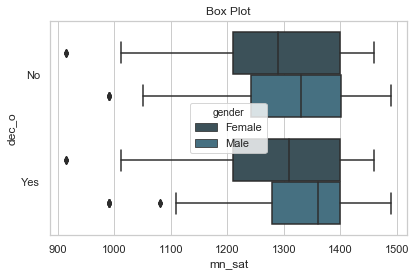

,dec_o,gender,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
mn_sat,No,Female,1006.0,1192,914.0,1210.0,1283.229622,1290.0,1400.0,1460.0,0.498207,0.169854,-1.971150,0.0,Reject H0
mn_sat,No,Male,785.0,1880,990.0,1242.0,1314.648408,1331.0,1402.0,1490.0,0.455844,0.901364,-1.187542,0.0,Reject H0
mn_sat,Yes,Female,847.0,1139,914.0,1210.0,1285.955136,1309.0,1400.0,1460.0,0.494566,0.297289,-1.911619,0.0,Reject H0
mn_sat,Yes,Male,495.0,1034,990.0,1280.0,1331.777778,1360.0,1400.0,1490.0,0.467903,0.753400,-1.432388,0.0,Reject H0


,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
dec_o,5.455171e+04,1.0,3.90121,0.0483392,0.00121497,0.000903257
gender,1.053313e+06,1.0,75.3266,6.30718e-18,0.0234594,0.0231407
dec_o:gender,3.793750e+04,1.0,2.71306,0.0996303,0.000844942,0.000533341
Residuals,4.375370e+07,3129.0,,,,


In [16]:
i, d, p = trivariate.analysis(x='mn_sat', y='dec_o', z='gender', df=df)
p
d
i

### 6.5.5 Partner  Decision by Tuition and Gender

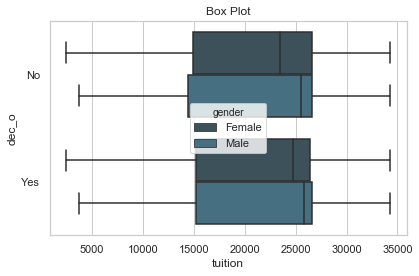

,dec_o,gender,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
tuition,No,Female,1134.0,1064,2406.0,14921.75,20598.606702,23500.0,26580.0,34290.0,0.499746,-0.063727,-1.995939,0.0,Reject H0
tuition,No,Male,882.0,1783,3730.0,14433.00,21299.964853,25533.0,26630.0,34300.0,0.470558,0.718480,-1.483786,0.0,Reject H0
tuition,Yes,Female,974.0,1012,2406.0,15162.00,21218.596509,24768.0,26377.0,34290.0,0.499908,0.038275,-1.998535,0.0,Reject H0
tuition,Yes,Male,593.0,936,3730.0,15162.00,22019.322091,25839.0,26562.0,34300.0,0.487257,0.460393,-1.788038,0.0,Reject H0


,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
dec_o,3.828104e+08,1.0,8.44034,0.00369237,0.00234582,0.00206732
gender,4.782837e+08,1.0,10.5454,0.00117554,0.00293087,0.0026522
dec_o:gender,2.088096e+06,1.0,0.0460391,0.830117,1.27956e-05,-0.00026506
Residuals,1.623250e+11,3579.0,,,,


In [17]:
i, d, p = trivariate.analysis(x='tuition', y='dec_o', z='gender', df=df)
p
d
i

### 6.5.6 Partner  Decision by University Rank and Gender

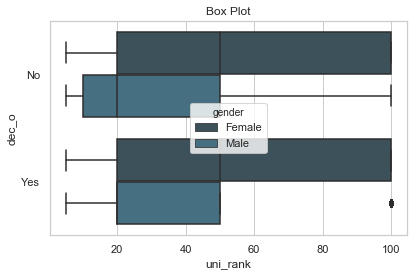

,dec_o,gender,count,missing,min,25%,mean,50%,75%,max,sd,skew,kurtosis,normality_p,normality
uni_rank,No,Female,1006.0,1192,5.0,20.0,49.975149,50.0,100.0,100.0,0.498207,0.169854,-1.971150,0.0,Reject H0
uni_rank,No,Male,785.0,1880,5.0,10.0,42.668790,20.0,50.0,100.0,0.455844,0.901364,-1.187542,0.0,Reject H0
uni_rank,Yes,Female,847.0,1139,5.0,20.0,49.386068,50.0,100.0,100.0,0.494566,0.297289,-1.911619,0.0,Reject H0
uni_rank,Yes,Male,495.0,1034,5.0,20.0,39.595960,20.0,50.0,100.0,0.467903,0.753400,-1.432388,0.0,Reject H0


,sum_sq,df,F,PR(>F),eta_sq,omega_sq
Terms,,,,,,
dec_o,1.897960e+03,1.0,1.63373,0.201282,0.000514291,0.000199433
gender,5.235429e+04,1.0,45.0657,2.25341e-11,0.0141865,0.0138673
dec_o:gender,1.128046e+03,1.0,0.971004,0.324506,0.000305667,-9.12502e-06
Residuals,3.635058e+06,3129.0,,,,


In [19]:
i, d, p = trivariate.analysis(x='uni_rank', y='dec_o', z='gender', df=df)
p
d
i